# Artifical Neural Networks
### Goal of lesson
- Understand Neural Networks
- How you can model other machine learning techniques
- Activation functions
- How to make simple OR function
- Different ways to calcualte weights
- What Batch sizes and Epochs are

### What is Artifical Neural Networks
- are computing systems inspired by the biological neural networks that constitute animal brains.
- Often just called Neural Networks

### Our first Neural Network
- $h(x_1, x_2) = w_0 + w_1 x_1 + w_2 x_2$

<img src="img/neural_network.png" width="600" align="left">

### With activation function
- Step function: $g(x) = 1$ if $x \geq 0$, else $0$
- Rectified linear unit (ReLU): $g(x) = \max(0, x)$
- Sigmoid activation function: sigmoid$(x) = 1 / (1 + \exp(-x))$

More activation functions: https://keras.io/api/layers/activations/

### Model the OR function
- or$(x_1, x_2) = 0$ if $x_1$ and $x_2$ are $0$, else $1$

<img src="img/neural_network-2.png" width="600" align="left">

### Neural Network

<img src="img/neural_network-3.png" width="600" align="left">

### Gradient Descent
- Calculate the weights ([wiki](https://en.wikipedia.org/wiki/Gradient_descent))
- Algorithm for minimizing the loss when training neural networks

**Pseudo algorithm**
- Start with a random choice of weights
- Repeat:
    - Calculate the gradient based on all data ponits direction that will lead to decreasing loss
    - Update wieghts accorinding to the gradient
    
Tradoff
- Expensive to calculate for all data points

### Stocastic Gradient Descent
**Pseudo algorithm**
- Start with a random choice of weights
- Repeat:
    - Calculate the gradient based on one data point direction that will lead to decreasing loss
    - Update wieghts accorinding to the gradient

### Mini-Batch Gradient Descent
**Pseudo algorithm**
- Start with a random choice of weights
- Repeat:
    - Calculate the gradient based on one small batch of data ponits direction that will lead to decreasing loss
    - Update wieghts accorinding to the gradient

### Perceptron
- Only capable of learning linearly separable decision boundary.
- It cannot model the XOR function (we need multi-layer perceptrons (multi-layer neural network))
- It can take multiple inputs and map linearly to one output with an activation function.

> #### Programming Notes:
> - Libraries used
>     - [**numpy**](http://numpy.org) - scientific computing with Python ([Lecture on NumPy](https://youtu.be/BpzpU8_j0-c))
>     - [**matplotlib**](http://matplotlib.org) - visualization with Python ([Lecture on **visualization**](https://youtu.be/htIh8YHh4xs))
>     - [**tensorflow**](https://www.tensorflow.org) - end-to-end open source machine learning platform
> - Functionality and concepts used
>     - [**Sequential**](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) provides training and inference features for a model
>     - [**Input**](https://www.tensorflow.org/api_docs/python/tf/keras/Input) is used to instantiate a Keras tensor.
>     - [**Dense**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) regular densely-connected Neural Network (NN) layer.

In [ ]:
# x1, x2 -> output
# calculating weights
# mini batch gradient descent : put things in small batches
#  instead of process all the data it takes some portion of the data

# linear separation can not make the model the xor function

In [1]:
# install tensorflow
!pip install tensorflow

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

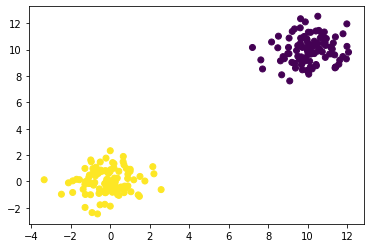

In [12]:
# artificial data
# rand와 randn의 distribution이 다르다.
data = np.random.randn(200, 3)
# add 10 on each columns of first 100 samples
data[:100, :2] += 10, 10
# data[100:, :2]에는 값을 더하지 않은 이유:
# data[100:, :2]에는 [0, 1)에 포함되는 임의의 실수가 있다.
# 두 group이 명확하게 구별되는 data를 만들기 위해 
# first 100 samples에만 10을 더했다.


# 이번에는 label을 add한 이유:
# since this is supervised learning 
# add labels to first 100 samples
data[:100, 2] = 0
# add labels to second 100 samples
data[100:, 2] = 1

# we want to create a model that optimizes this.
fig, ax = plt.subplots()
ax.scatter(x=data[:,0], y=data[:,1], c=data[:,2])

In [13]:
X = data[:, :2]
y = data[:, 2]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

### batch size  and epoch explained
Understand how to correctly utilize Keras fit():
- **Batch size**: a set of N samples.
- **Epoch**: an arbitrary cutoff, generally defined as "one pass over the entire dataset".

In [15]:
# batch size : a set of samples you use in each iteration (subset of all the data)
# epoch : how many times the model will run over all the data

# wtd: model a linear separator
model = Sequential()
#model.add(Input())

# Is there a way to set the initial weights of this layer?
# sigmoid : binary classification
model.add(Dense(1, input_dim=2, activation='sigmoid')) # definition of our model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

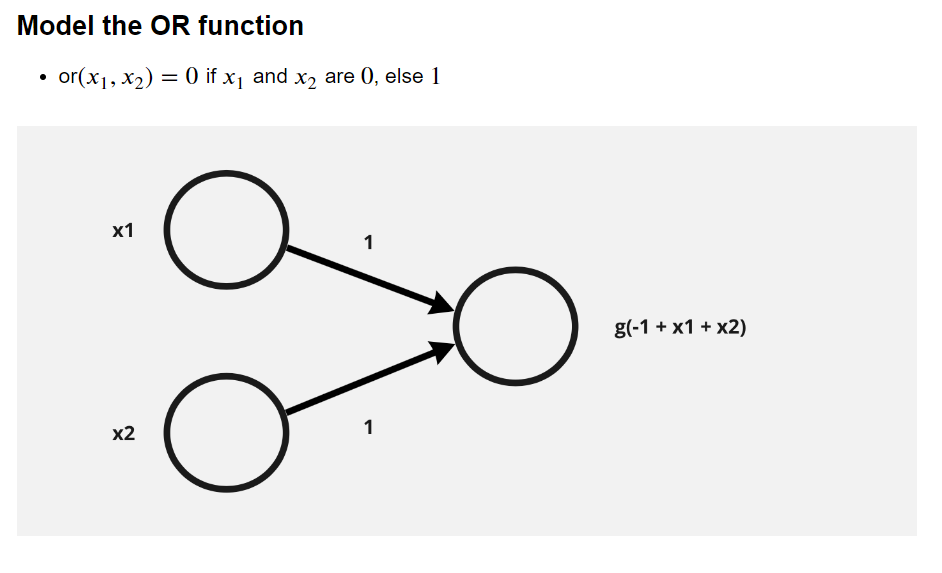

In [16]:
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)

In [18]:
model.evaluate(X_valid, y_valid) # might be overfitted

2/2 [==============================] - 0s 4ms/step - loss: 0.0564 - accuracy: 1.0000


[0.0564388670027256, 1.0]

7/7 [==============================] - 0s 987us/step


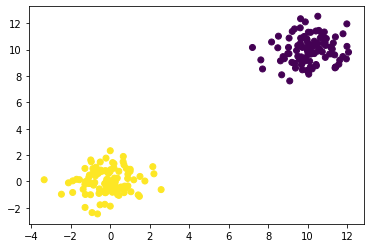

In [21]:
y_pred = model.predict(X)

# color를 distinct하게 만드는 라인: 
# if y_pred is less than 0.5 then put zero,
# otherwise put 1.
y_pred = np.where(y_pred < .5, 0, 1)

fig, ax = plt.subplots()
# visualize all the points
ax.scatter(x=X[:,0], y=X[:,1], c=y_pred)

313/313 [==============================] - 0s 654us/step


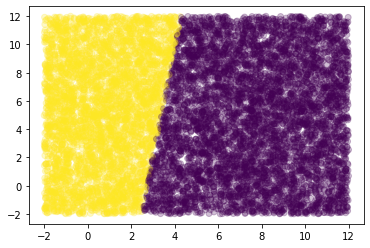

In [25]:
# full map 
X_full = np.random.rand(10000, 2)
# scale이 -2 to 12이므로 that's around 14
X_full = X_full*(14,14) + (-2,-2)

y_full = model.predict(X_full)
# to get the border
y_full = np.where(y_full < .5, 0, 1) # sigmoid


fig, ax = plt.subplots()
# you can see the coloring. 
# this is how the model is choosing
ax.scatter(x=X_full[:, 0], y=X_full[:, 1], c=y_full, alpha=.25)